# Carbon Monoxide Column (XO)

Plot the column variable `x_col` a.k.a. XCO, in ppbv. The XCO is a pre-calculated vertically averaged dry air mixing ratio of carbon monoxide from the surface to Top of Atmosphere (TOA).

Carbon Monoxide concentrations retrieved from [CrIS JPSS-1](https://www.nesdis.noaa.gov/current-satellite-missions/currently-flying/joint-polar-satellite-system/cross-track-infrared) global observations.

## Import packages

In [12]:
import numpy as np
from netCDF4 import Dataset

import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap

## Read data variables

In [13]:
# Open the netCDF file
dataset = Dataset('./data/TROPESS_CrIS-JPSS1_L2_Summary_CO_20230516_MUSES_R1p20_FS_F0p6.nc', 'r')

# Read the data from your variables
latitude = dataset.variables['latitude'][:]
longitude = dataset.variables['longitude'][:]
x_col = dataset.variables['x_col'][:]

dataset.close()

## Create plots

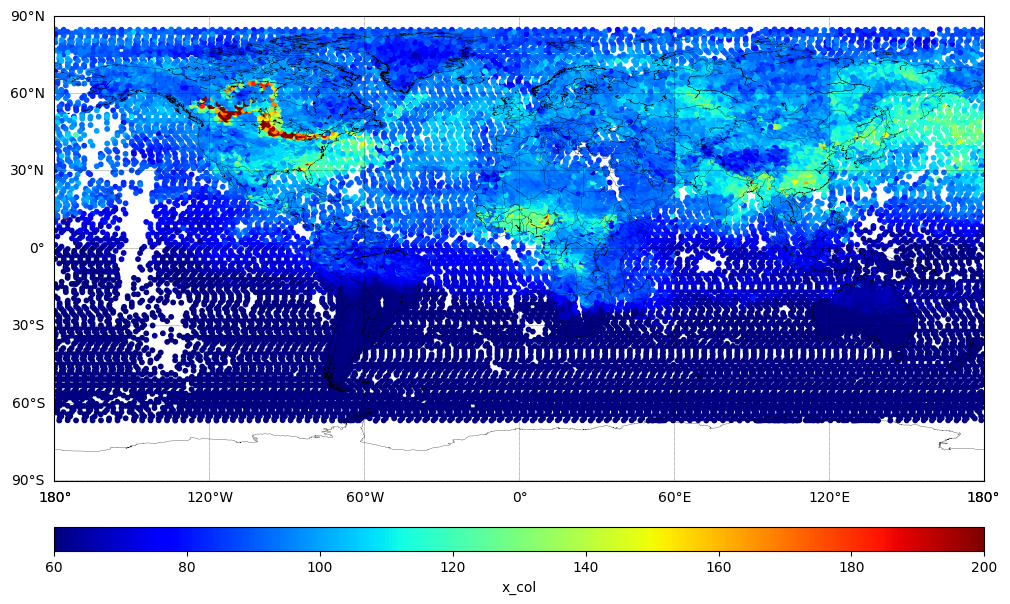

In [15]:
# Specify figure size (in inches)
plt.figure(figsize=(12, 8))  

# Create a basemap instance
m = Basemap(projection='cyl', resolution='l', 
            llcrnrlat=-90, urcrnrlat=90,  # set latitude limits to -90 and 90
            llcrnrlon=-180, urcrnrlon=180)  # set longitude limits to -180 and 180

m.drawcoastlines(linewidth=0.2)
m.drawcountries(linewidth=0.2)

# Draw parallels (latitude lines) and meridians (longitude lines)
parallels = np.arange(-90., 91., 30.)
m.drawparallels(parallels, labels=[True,False,False,False], linewidth=0.3)

meridians = np.arange(-180., 181., 60.)
m.drawmeridians(meridians, labels=[False,False,False,True], linewidth=0.3)    

# Standard catter plot
# Transform lat and lon to map projection coordinates
x, y = m(longitude, latitude)

# Plot the data using scatter (you may want to choose a different colormap and normalization)
sc = m.scatter(x, y, c=x_col, cmap='jet', s=10, vmin=60.0, vmax=200.0)

# Add a colorbar
cbar = m.colorbar(sc, location='bottom', pad="10%")
cbar.set_label('x_col')

plt.show()